# **Final Project**

Name: Fajrur Rahman Suprapto

## **Business Question**

This project focus on 5 questions below:
1. Total sales by date
2. Sales trends/monthly sales
3. Total sales by product
4. Total sales by location
5. Customers with highest number of purchase

## **Import Library**

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Read the Data**

In [20]:
# read the data
df = pd.read_csv('Superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## **Exploratory Data Analysis**

In [3]:
# simple data checking - get general information from dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
# check duplicate rows
duplicate = df[df.duplicated()]
duplicate

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [28]:
# drop columns
df.drop('Row ID', axis = 1, inplace = True)

In [6]:
# check missing value
df.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


There are 11 records with NaN values, but because the missing data is Postal Code, it will not affect our product sales analysis. So we will just ignore from the dataset.


In [21]:
# convert columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = '%d/%m/%Y')

In [120]:
# add columns for analysis
df['Order Day'] = pd.DatetimeIndex(df['Order Date']).dayofweek
df['Order Month'] = pd.DatetimeIndex(df['Order Date']).month
df['Order Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Order Month Year'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
df['Sales (K)'] = df['Sales'] / 1000

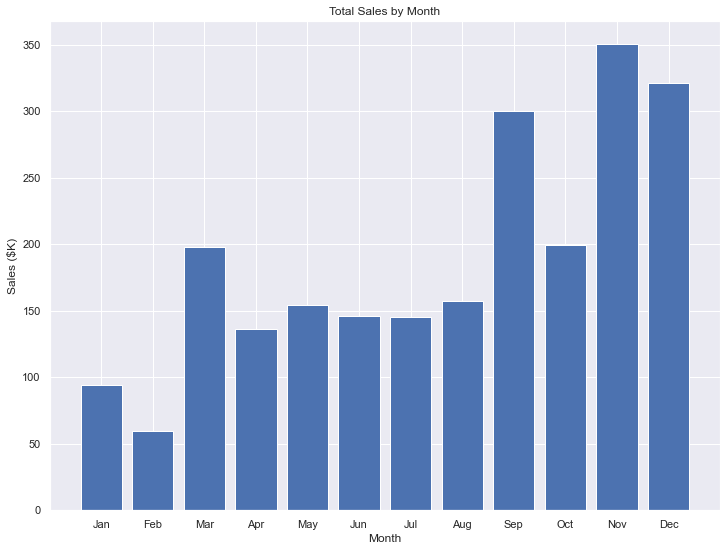

In [164]:
# visualize total sales by month
sales_by_month = df.groupby(['Order Month'], as_index = False).sum()

x = sales_by_month['Order Month']
y = sales_by_month['Sales (K)']

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize = (12, 9))
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.xticks(x, month_names)
plt.ylabel('Sales ($K)')
plt.bar(x, y)
plt.show()

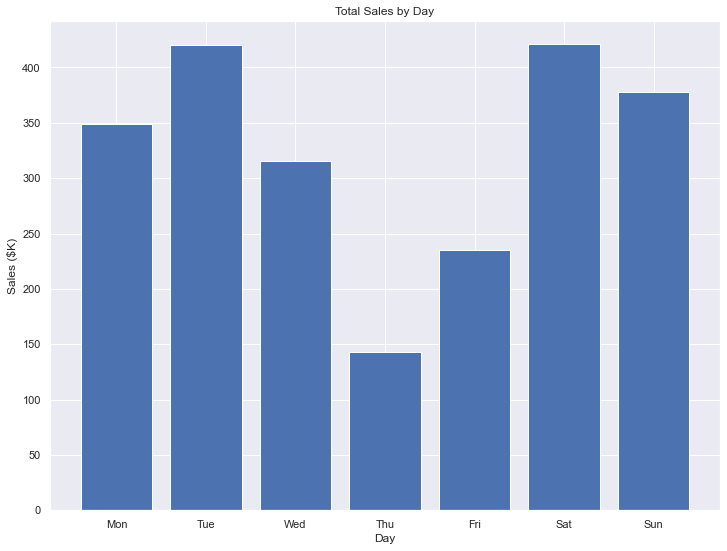

In [163]:
# visualize total sales by day
sales_by_day = df.groupby(['Order Day'], as_index = False).sum()

x = sales_by_day['Order Day']
y = sales_by_day['Sales (K)']

day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize = (12, 9))
plt.title('Total Sales by Day')
plt.xlabel('Day')
plt.xticks(x, day_names)
plt.ylabel('Sales ($K)')
plt.bar(x, y)
plt.show()

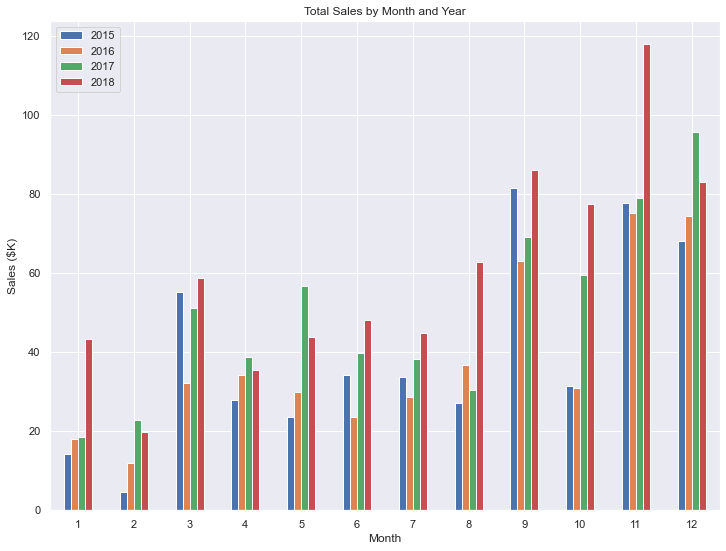

In [167]:
# visualize total sales by month and year
sales_by_month_year = df.groupby(['Order Month', 'Order Year'], as_index = False).sum()
sales_by_month_year = sales_by_month_year.pivot(index = 'Order Month', columns = 'Order Year', values = 'Sales (K)')

sales_by_month_year.plot(kind = 'bar', figsize = (12, 9))
plt.title('Total Sales by Month and Year')
plt.xlabel('Month')
plt.xticks(rotation = 360)
plt.ylabel('Sales ($K)')
plt.legend(loc = 'upper left')
plt.show()

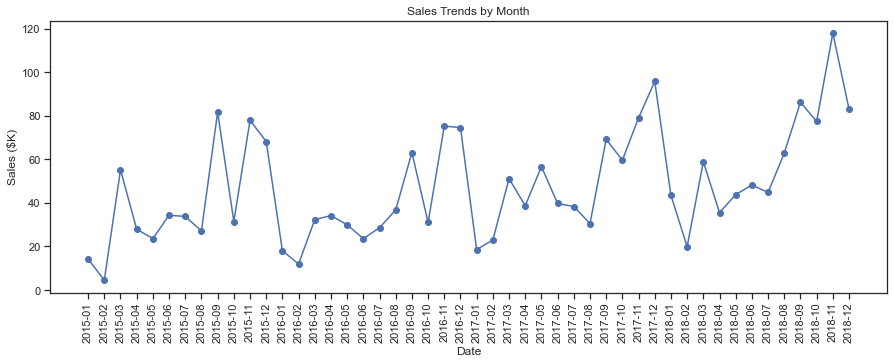

In [84]:
# visualize sales trends by month
sales_trends = df.groupby(['Order Month Year'], as_index = False).sum()

x = sales_trends['Order Month Year']
y = sales_trends['Sales (K)']

plt.figure(figsize = (15, 5))
plt.title('Sales Trends by Month')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Sales ($K)')
plt.plot(x, y, marker = 'o')
plt.show()

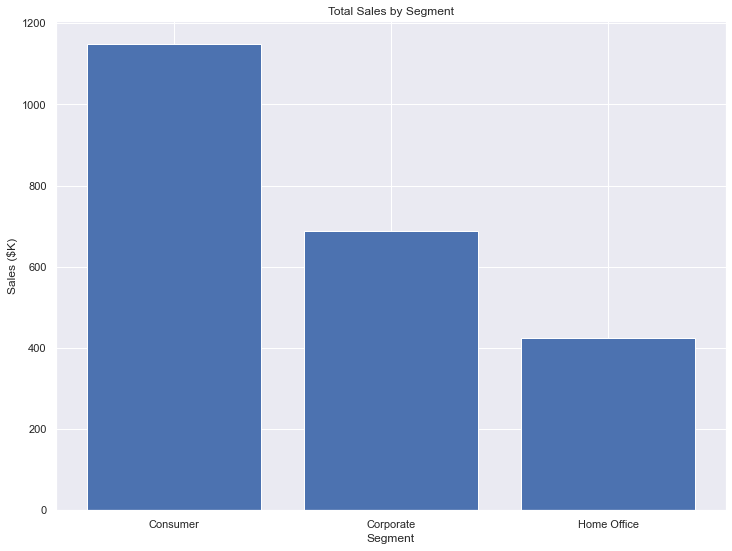

In [150]:
# visualize total sales by segment
sales_by_segment = df.groupby(['Segment'], as_index = False).sum()

x = sales_by_segment['Segment']
y = sales_by_segment['Sales (K)']

plt.figure(figsize=(12, 9))
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales ($K)')

plt.bar(x, y)
plt.show()

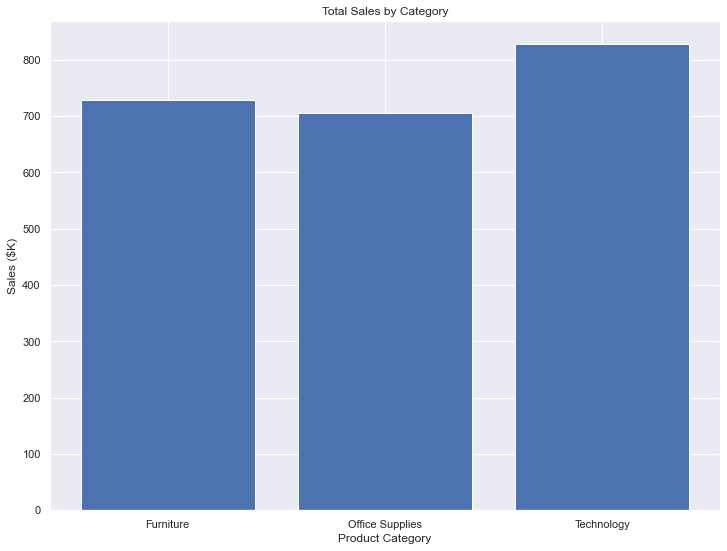

In [108]:
# visualize total sales by category
sales_by_category = df.groupby(['Category'], as_index = False).sum()

x = sales_by_category['Category']
y = sales_by_category['Sales (K)']

plt.figure(figsize=(12, 9))
plt.title('Total Sales by Category')
plt.xlabel('Product Category')
plt.ylabel('Sales ($K)')

plt.bar(x, y)
plt.show()

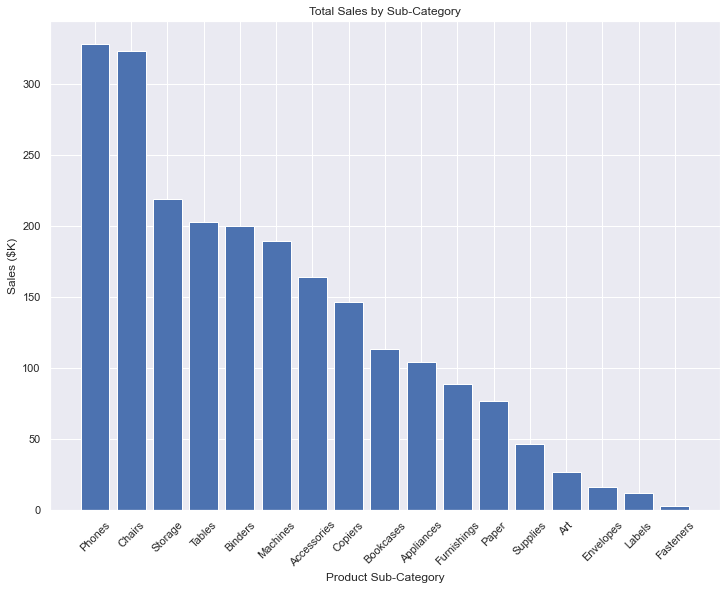

In [127]:
# visualize total sales by sub-category
sales_by_subcategory = df.groupby(['Sub-Category'], as_index = False).sum()
sales_by_subcategory = sales_by_subcategory.sort_values(['Sales (K)'], ascending=False)

x = sales_by_subcategory['Sub-Category']
y = sales_by_subcategory['Sales (K)']

plt.figure(figsize=(12, 9))
plt.title('Total Sales by Sub-Category')
plt.xlabel('Product Sub-Category')
plt.xticks(rotation = 45)
plt.ylabel('Sales ($K)')

plt.bar(x, y)
plt.show()

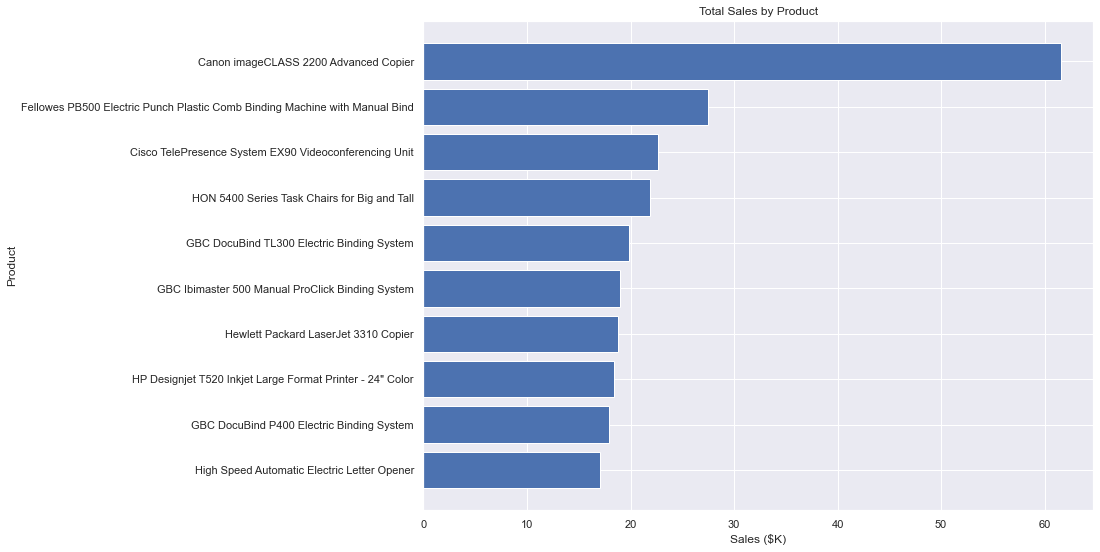

In [152]:
# visualize total sales by product
sales_by_product= df.groupby(['Product Name'], as_index = False).sum()
sales_by_product = sales_by_product.sort_values(['Sales (K)'], ascending=False)
sales_by_product = sales_by_product.head(10)

x = sales_by_product['Product Name']
y = sales_by_product['Sales (K)']

plt.figure(figsize=(12, 9))
plt.title('Total Sales by Product')
plt.xlabel('Sales ($K)')
plt.ylabel('Product')

plt.barh(x, y)
plt.gca().invert_yaxis()
plt.show()

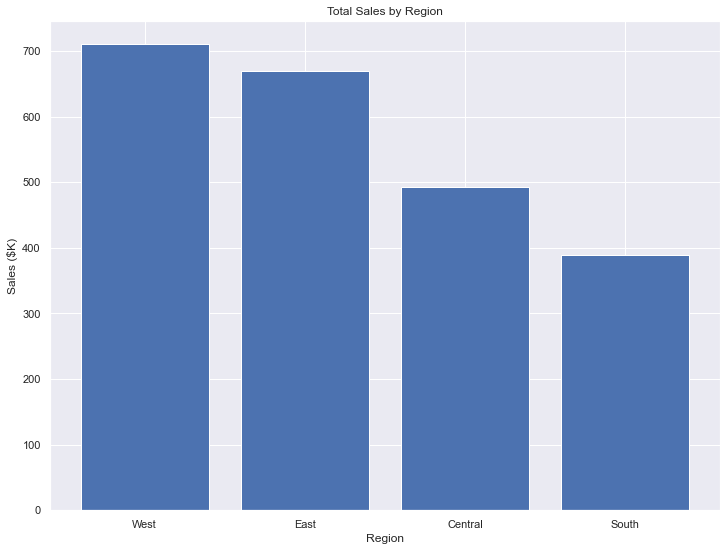

In [142]:
# visualize total sales by region
sales_by_region = df.groupby(['Region'], as_index = False).sum()
sales_by_region = sales_by_region.sort_values(['Sales (K)'], ascending=False)

x = sales_by_region['Region']
y = sales_by_region['Sales (K)']

plt.figure(figsize=(12, 9))
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales ($K)')

plt.bar(x, y)
plt.show()

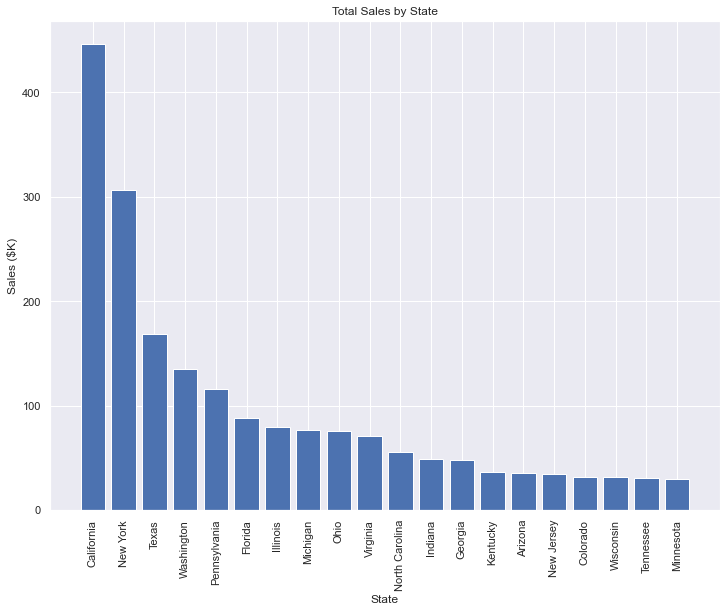

In [144]:
# visualize total sales by state
sales_by_state = df.groupby(['State'], as_index = False).sum()
sales_by_state = sales_by_state.sort_values(['Sales (K)'], ascending=False)
sales_by_state = sales_by_state.head(20)

x = sales_by_state['State']
y = sales_by_state['Sales (K)']

plt.figure(figsize=(12, 9))
plt.title('Total Sales by State')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.ylabel('Sales ($K)')

plt.bar(x, y)
plt.show()

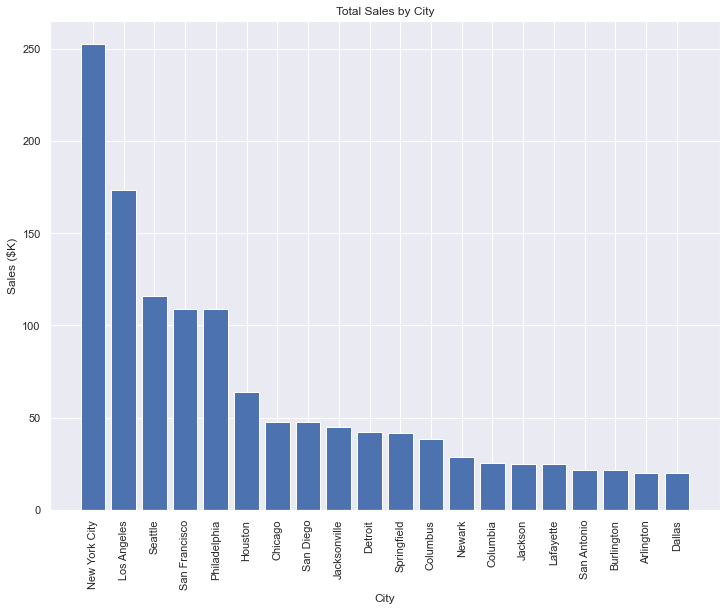

In [145]:
# visualize total sales by city
sales_by_city = df.groupby(['City'], as_index = False).sum()
sales_by_city = sales_by_city.sort_values(['Sales (K)'], ascending=False)
sales_by_city = sales_by_city.head(20)

x = sales_by_city['City']
y = sales_by_city['Sales (K)']

plt.figure(figsize=(12, 9))
plt.title('Total Sales by City')
plt.xlabel('City')
plt.xticks(rotation = 90)
plt.ylabel('Sales ($K)')

plt.bar(x, y)
plt.show()

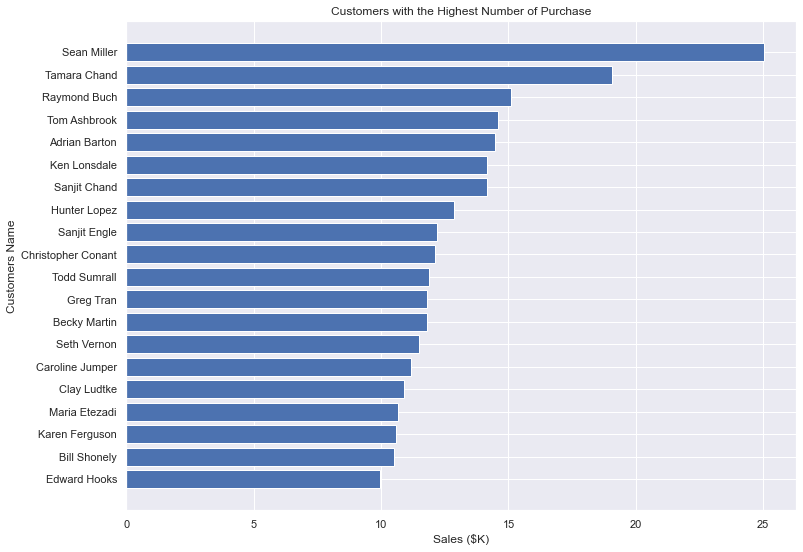

In [157]:
# visualize customers with the highest number of purchase
sales_by_customer = df.groupby(['Customer Name'], as_index = False).sum()
sales_by_customer = sales_by_customer.sort_values(['Sales (K)'], ascending=False)
sales_by_customer = sales_by_customer.head(20)

x = sales_by_customer['Customer Name']
y = sales_by_customer['Sales (K)']

plt.figure(figsize=(12, 9))
plt.title('Customers with the Highest Number of Purchase')
plt.xlabel('Sales ($K)')
plt.ylabel('Customers Name')

plt.barh(x, y)
plt.gca().invert_yaxis()
plt.show()

